# Exploratory Data Analysis + gráficos (Pandas, Matplotlib, Plotly, Seaborn)  

**Grupo 4** : 
* Vinicius Maciel e Souza
* Gustavo Perbone
* Daniel Garcia Ribeiro

O dataset escolhido pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand), e foi extraído do artigo ["Hotel booking demand datasets"](https://www.sciencedirect.com/science/article/pii/S2352340918315191) escrito por Nuno Antonio, Ana Almeida, e Luis Nunes para Data in Brief, Volume 22, Fevereiro 2019.

A base presente no Kaggle foi limpada por Thomas Mock e Antoine Bichat.

As **32 variáveis** presentes no dataset são:
*  **hotel** = Resort Hotel or City Hotel
*  **is_canceled**	= Value indicating if the booking was canceled (1) or not (0)
*  **lead_time** = Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
*  **arrival_date_year** = Year of arrival date
*  **arrival_date_month** = Month of arrival date
*  **arrival_date_week_number** = Week number of year for arrival date
*  **arrival_date_day_of_month** = Day of arrival date
*  **stays_in_weekend_nights** = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*  **stays_in_week_nights** = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
*  **adults** = Number of adults
*  **children** = Number of children
*  **babies** = Number of babies
*  **meal** = Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
*  **country**	= Country of origin. Categories are represented in the ISO 3155–3:2013 format
*  **market_segment** = Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*  **distribution_channel** = Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*  **is_repeated_guest** = Value indicating if the booking name was from a repeated guest (1) or not (0)
*  **previous_cancellations** = Number of previous bookings that were cancelled by the customer prior to the current booking
*  **previous_bookings_not_canceled** = Number of previous bookings not cancelled by the customer prior to the current booking
*  **reserved_room_type** = Code of room type reserved. Code is presented instead of designation for anonymity reasons.
*  **assigned_room_type** = Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
*  **booking_changes** = Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
*  **deposit_type** = Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
*  **agent** = ID of the travel agency that made the booking
*  **company** = ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
*  **days_in_waiting_list** = Number of days the booking was in the waiting list before it was confirmed to the customer
*  **customer_type** = Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
*  **adr** = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
*  **required_car_parking_spaces** = Number of car parking spaces required by the customer
*  **total_of_special_requests** = Number of special requests made by the customer (e.g. twin bed or high floor)
*  **reservation_status** = Reservation last status, assuming one of three categories:	BO; Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
*  **reservation_status_date** = Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# 1. Exploratory Data Analysis, Manipulation and Cleaning

In [1]:
# Bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Importação do DataFrame
df_booking = pd.read_csv('hotel_bookings.csv', parse_dates=['reservation_status_date'])
df_booking.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [2]:
# Informações gerai sobre as colunas do DataFrame
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

### Há dados faltantes! Vamos verificar quais e quantos:

In [3]:
# Verificação de quais colunas possuem dados nulos
df_booking.isna().sum()[df_booking.isna().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

### 94% dos dados da coluna 'company' estão faltando, e a coluna 'agent'não será usada, portanto serão descartadas. Para a coluna 'children', preencheremos os 4 valores com o número 0, e para a coluna 'country' preencheremos com 'Other'.

In [4]:
df_booking.drop(['agent', 'company'], axis=1, inplace=True)
df_booking['children'].fillna(0, inplace=True)
df_booking['country'].fillna('Other', inplace=True)

# Verificação
df_booking.isna().sum()[df_booking.isna().sum() > 0]

Series([], dtype: int64)

In [5]:
# Análise dos dados numéricos do DataFrame
df_booking.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119390.000000  119390.000000      119390.000000   
mean        0.103886       0.007949           0.031912   
std         0.398555       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes  days_in_waiting_list            adr  \
count    119390.000000         119390.000000  119390.000000   
mean          0.221124              2.321149     101.831122   
std           0.652306             17.594721      50.535790   
min           0.000000              0.000000      -6.380000   
25%           0.000000              0.000000      69.290000   
50%           0.000000              0.000000      94.575000   
75%           0.000000              0.000000     126.000000   
max          21.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                119390.000000              119390.000000  
mean                      0.062518                   0.571363  
std                       0.245291                   0.792798  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000                   1.000000  
max                       8.000000                   5.000000

# 2. Data Visualization

## 2.1. Which months are the busiest? In what country are the hotels?

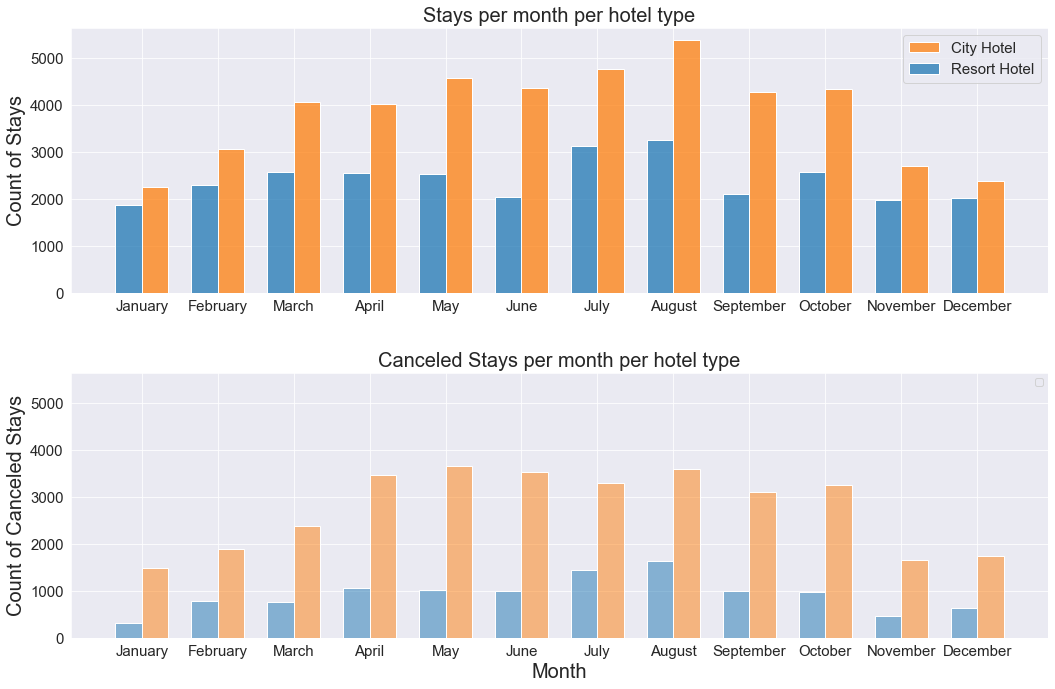

In [34]:
df_booking['arrival_date_month'] = pd.Categorical(df_booking['arrival_date_month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharey=True)

sns.histplot(data=df_booking[df_booking['is_canceled']==0], x='arrival_date_month', discrete=True, hue='hotel', multiple='dodge', shrink=0.7, ax=ax[0])
sns.histplot(data=df_booking[df_booking['is_canceled']==1], x='arrival_date_month', discrete=True, hue='hotel', multiple='dodge', shrink=0.7, ax=ax[1], alpha=0.5)
ax[0].set_title('Stays per month per hotel type', fontsize=20)
ax[1].set_title('Canceled Stays per month per hotel type', fontsize=20)
fig.tight_layout(pad=3)
ax[0].set_xlabel(None)
ax[1].set_xlabel('Month', fontsize=20)
ax[0].set_ylabel('Count of Stays', fontsize=20)
ax[1].set_ylabel('Count of Canceled Stays', fontsize=20)
ax[0].legend(title=None, labels=['City Hotel', 'Resort Hotel'], fontsize=15)
ax[1].legend(labels=[])
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15);

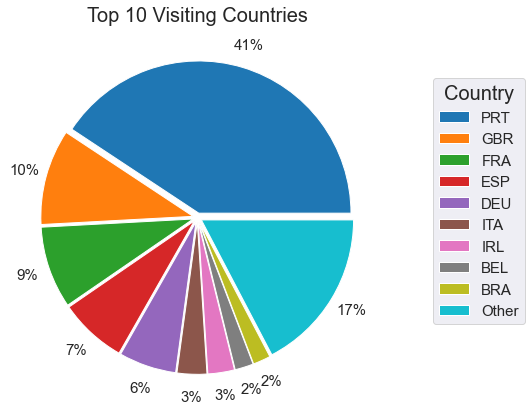

In [62]:
top_9_country = list(df_booking['country'].value_counts().index[:9])
df_booking['country_2'] = df_booking['country'].apply(lambda x: x if x in top_9_country else 'Other')
ax = df_booking['country_2'].value_counts().reindex(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'Other']).plot(kind='pie', autopct='%1.0f%%', labeldistance=None, figsize=(10,7), fontsize=15, pctdistance=1.15, explode=np.repeat(0.03,10))
ax.set_ylabel('')
ax.legend(loc='lower left', bbox_to_anchor = (1.1,0.2), title='Country', fontsize=15, title_fontsize=20)
ax.set_title('Top 10 Visiting Countries', fontsize=20);

### **Analysis**: the busiest months are from May to September, which leads us to believe those are summer months in the country where the hotels are. Most visitors are from Portugal (41%) and other European countries, which makes us suppose the hotels are in Portugal.
### The assumption is confirmed by reading the article: Resort Hotel is in Algarve, and City Hotel is in Lisbon.

## 2.2. Are the busiest months more profitable? 

**adr** = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

In [85]:
df_booking_prices = df_booking.pivot_table(index='hotel', columns='arrival_date_month', values='adr', aggfunc='mean').T
fig = px.line(data_frame=df_booking_prices)

fig.update_layout(
    xaxis_title = {
        'text':'Month',
        'font_size': 20,
        'font_family':'Times New Roman'
    },
    yaxis_title = {
        'text':'Profit',
        'font_size': 20,
        'font_family':'Times New Roman'
    },
    title = {
        'text':'Mean Profit per Booking Month',
        'font_size': 20,
        'font_family':'Times New Roman',
        'x':0.5,
        'y':1,
        'font_color':'black'
    },
    legend_title=None,
    template='plotly_white',
    xaxis={
        'tickangle':-45,
        'tickfont': {
            'size':15
        }
    },
    yaxis={
        'tickfont': {
            'size':15
        }
    }
)


### **Analysis**: Yes, in general, the busiest months are the most profitable. The summer is the only time when the Resort Hotel is more profitable than the City Hotel.

## 2.3. Are there more reservation issues in the busiest months?

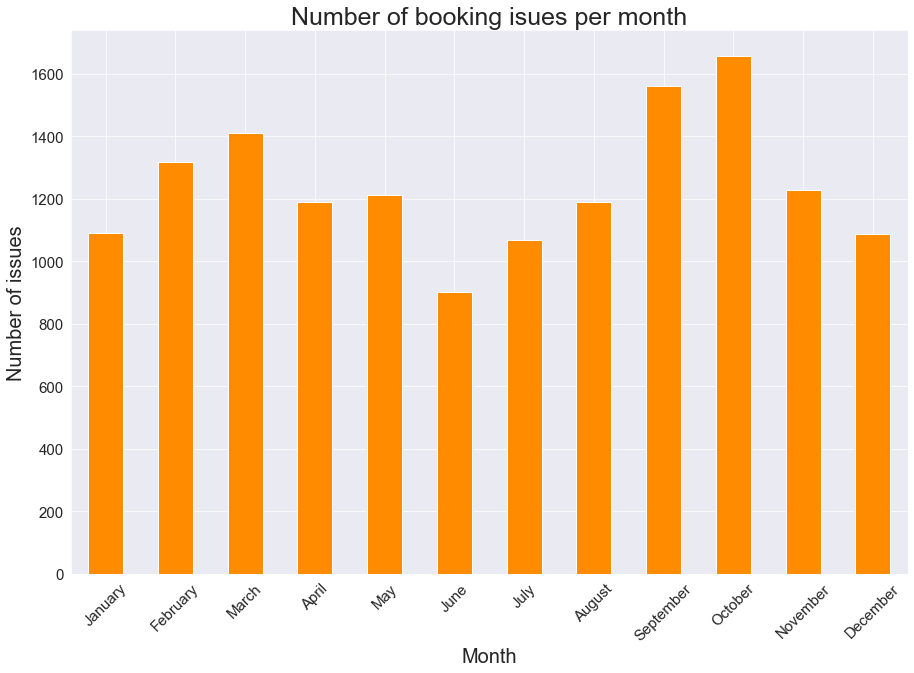

In [100]:
plt.figure(figsize=(15,10))
df_booking['reserved_room_is_assigned'] = df_booking['reserved_room_type'] == df_booking['assigned_room_type']
ax = df_booking.pivot_table(index='arrival_date_month', columns='reserved_room_is_assigned', aggfunc='count').adr.iloc[:, 0].plot(kind='bar', color='darkorange');

ax.set_title('Number of booking isues per month', fontsize=25)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Number of issues', fontsize=20)
ax.set_xlabel('Month', fontsize=20)
ax.tick_params(axis='x', labelsize=15, rotation=45)
ax.tick_params(axis='y', labelsize=15);

### **Analysis**: there is no correlation between the busiest months and the months when guests are not assigned the rooms they reserved. This might mean the hotels have very good management.

## 2.4. Do people book earlier for the busiest months?

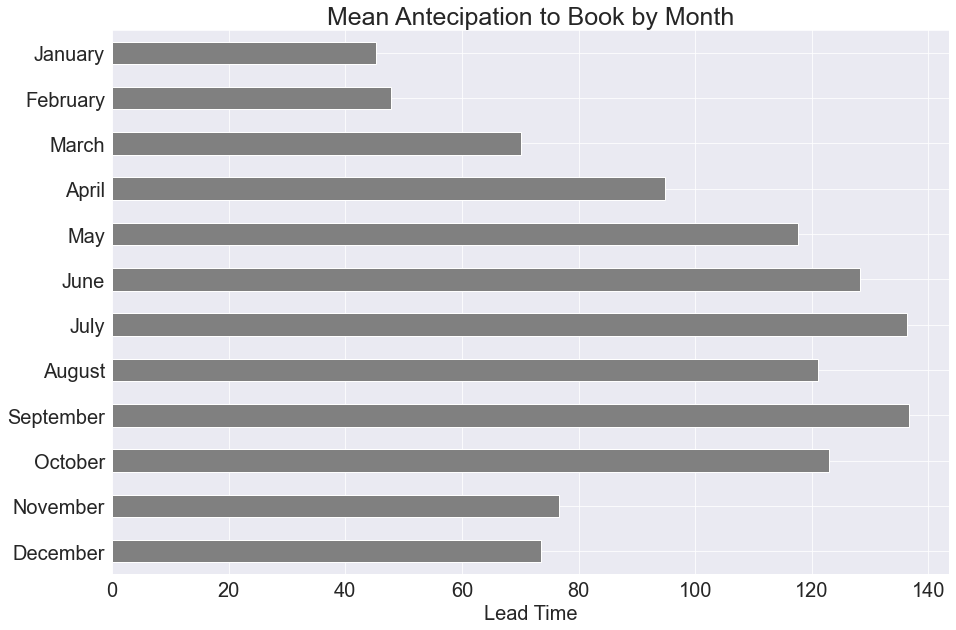

In [112]:
ax=df_booking.pivot_table(index='arrival_date_month', values='lead_time').plot(kind='barh', figsize=(15,10),xlabel='', legend=None, fontsize=20, color='grey')
ax.set_xlabel('Lead Time', fontsize=20)
ax.set_title('Mean Antecipation to Book by Month', fontsize=25)
ax.invert_yaxis();

### **Analysis**: Yes, in general, people book earlier if they are planning to arrive in the busiest months.

## 2.5. And will the booking be cheaper if I book earlier?

In [147]:
df_booking_antecipation = df_booking.pivot_table(index='lead_time', values='adr', aggfunc='mean')
df_booking_antecipation
fig = px.scatter(data_frame=df_booking_antecipation)

fig.update_layout(
    xaxis_title = {
        'text':'Lead Time',
        'font_size': 20,
        'font_family':'Times New Roman'
    },
    yaxis_title = {
        'text':'Profit',
        'font_size': 20,
        'font_family':'Times New Roman'
    },
    title = {
        'text':'Mean Profit per Days in Advance',
        'font_size': 20,
        'font_family':'Times New Roman',
        'x':0.5,
        'y':1,
        'font_color':'black'
    },
    legend_title=None,
    showlegend=False,
    template='plotly_white',
    xaxis={
        'tickangle':-45,
        'tickfont': {
            'size':15
        }
    },
    yaxis={
        'tickfont': {
            'size':15
        }
    }
)

### **Analysis**: Yes, for bookings with 200 days of antecipation, the hotels have less profit. This might mean the rates tend to be cheaper, when booked in advance.

## 2.6. Which hotel does each public prefer?

In [12]:
df_booking_only_adults = df_booking[(df_booking['babies']==0) & (df_booking['children']==0)].pivot_table(index='hotel', values='adults', aggfunc='count')
df_booking_has_children = df_booking[df_booking['children']>0].pivot_table(index='hotel', values='children', aggfunc='count')
df_booking_has_babies = df_booking[df_booking['babies']>0].pivot_table(index='hotel', values='babies', aggfunc='count')
df_booking_family_members = df_booking_only_adults.join(df_booking_has_children).join(df_booking_has_babies)
df_booking_family_members

adults  children  babies
hotel                                 
City Hotel     73927      5106     369
Resort Hotel   36131      3484     548

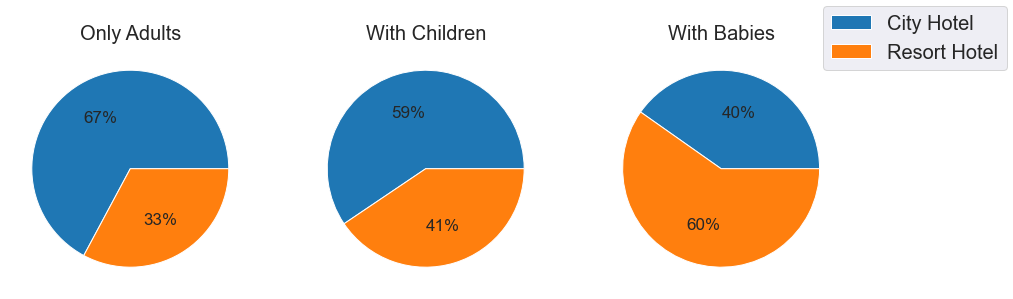

In [135]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
ax[0].pie(data=df_booking_family_members, x='adults', autopct='%1.0f%%', textprops={'fontsize':17})
ax[0].set_title('Only Adults', fontsize=20)
ax[1].pie(data=df_booking_family_members, x='children', autopct='%1.0f%%', textprops={'fontsize':17})
ax[1].set_title('With Children', fontsize=20)
ax[2].pie(data=df_booking_family_members, x='babies', autopct='%1.0f%%', textprops={'fontsize':17})
ax[2].set_title('With Babies', fontsize=20)
ax[2].legend(labels=df_booking_family_members.index, loc='upper right', bbox_to_anchor=(1.7,1.2), fontsize=20);

### **Analysis**: When adults are on their own or if they have children, they prefer the City Hotel. Families with babies prefer the Resort Hotel. This may be because when babies are involved, parents want a more controlled environments, as in other scenarios, they can go out and explore new places.
### Another interesting analysis could be which hotel is prefered per each guest's nationality.

## 2.7. Should the hotels focus in a specific meal package?

*  **meal** = Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

In [14]:
df_booking_meal = df_booking.pivot_table(index='meal', columns='hotel', aggfunc='count').adr.fillna(0)
df_booking_meal.loc['SC'] += df_booking_meal.loc['Undefined']
df_booking_meal.drop('Undefined', inplace=True)
df_booking_meal

hotel  City Hotel  Resort Hotel
meal                           
BB        62305.0       30005.0
FB           44.0         754.0
HB         6417.0        8046.0
SC        10564.0        1255.0

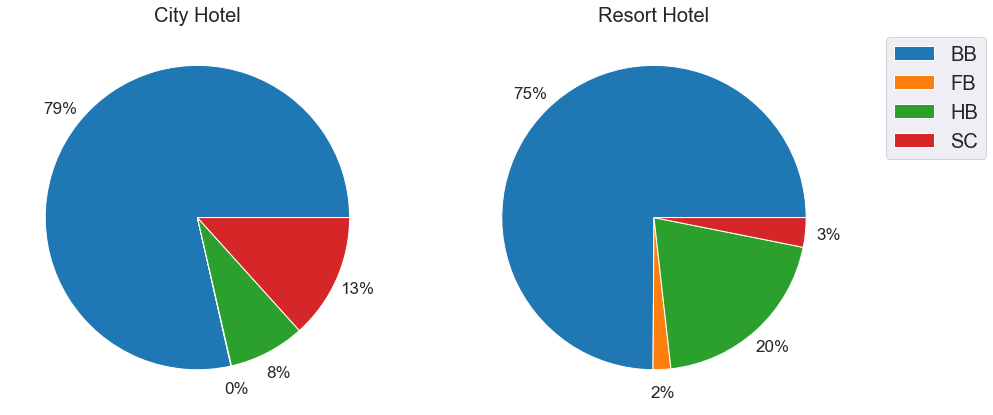

In [143]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

ax[0].pie(data=df_booking_meal, x='City Hotel', autopct='%1.0f%%', textprops={'fontsize':17}, pctdistance=1.15)
ax[0].set_title('City Hotel', fontsize=20)
ax[1].pie(data=df_booking_meal, x='Resort Hotel', autopct='%1.0f%%', textprops={'fontsize':17}, pctdistance=1.15)
ax[1].set_title('Resort Hotel', fontsize=20)
ax[1].legend(labels=df_booking_meal.index, fontsize=20, bbox_to_anchor=(1.4,1.0));

### **Analysis**: In the City Hotel, most guests buy the breakfast only, followed by the guests who don't purchase any meal plans. In the Resort Hotel, most guest buy breakfast only too, but they are followed by guests who purchase breakfast + other meal (usually dinner). This might mean City Hotel guests eat out more than the Resort Hotel guests, probably because the Resort Hotel guests are further away from restaurants.

## 2.8. Are there any other correlations among our numeric data?

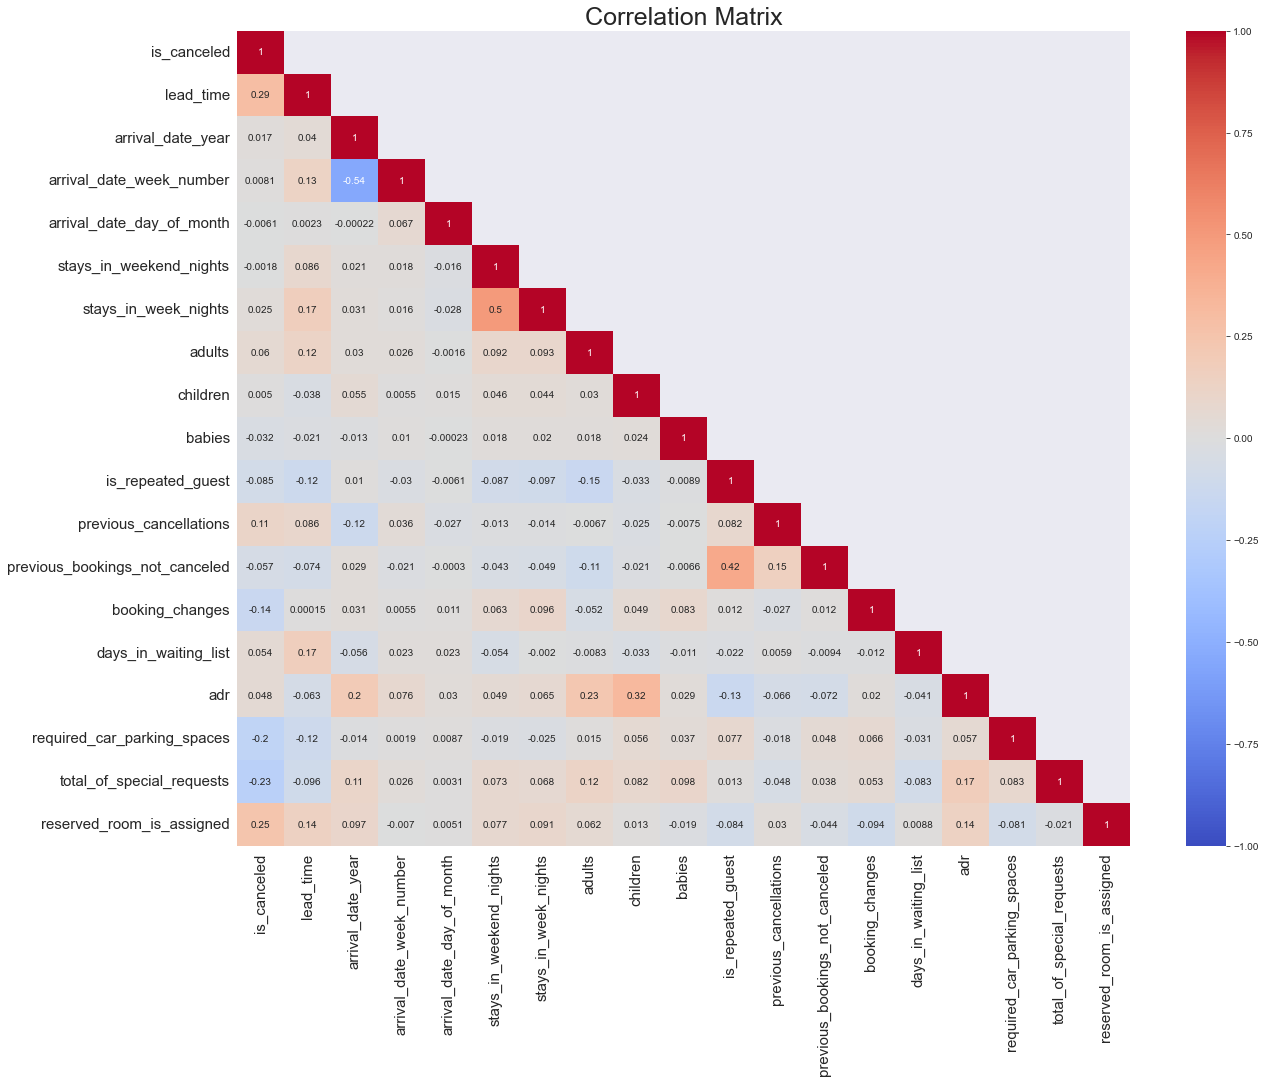

In [145]:
correlacoes = df_booking.corr()
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
mask = np.triu(np.ones_like(correlacoes, dtype=bool))
for i in range(len(mask)):
    for j in range(len(mask)):
        if i == j:
            mask[i][j] = False

ax = sns.heatmap(correlacoes, cmap='coolwarm', vmax=1, vmin=-1, annot=True, mask=mask)
ax.set_title('Correlation Matrix', fontsize = 25)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15);

### **Analysis**: the largest correlation coefficient is 0.54 for 'arrival_date_week_number' and 'arrival_date_year", which seems to be an spurious correlation. The second largest is for 'stays_in_week_nights' and 'stays_in_weekend_nights' (0.5). Let's analyze that!

## 2.9. Do people stay more weekend nights if they are staying more week nights?

In [152]:
fig = px.scatter(data_frame=df_booking, x='stays_in_week_nights', y='stays_in_weekend_nights', color='hotel', marginal_x='box', marginal_y='box')

fig.update_layout(
    xaxis_title = {
        'text':'Stays in Week Nights',
        'font_size': 20
    },
    yaxis_title = {
        'text':'Stays in Weekend Nights',
        'font_size': 20
    },
    title = {
        'text':'Stays in Week Nights vs. Stays in Weekend Nights',
        'font_size': 20,
        'x':0.5,
        'y':0.95,
        'font_color':'black'
    },
    legend_title=None,
    showlegend=False,
    xaxis={
        'tickangle':-45,
        'tickfont': {
            'size':15
        }
    },
    yaxis={
        'tickfont': {
            'size':15
        }
    }
)

### **Analysis**: yes, naturally, as the days of the week a guest stays grow, they must stay more weekend nights in the same reservation.